**Описание проекта**

Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. 

План работ:

1.  Откроем файл и изучим его

2.  Подготовка данных

   2.1  Заменим названия столбцов и приведем к нижнему регистру
  
  2.2  Изучим пропущенные значения
  
  2.3  Преобразуем типы данных в нужные.
  
  2.4  Проверим наш датафрейи на дубликаты
  
  2.5  Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.
  
3.  Исследовательский анализ данных

  3.1  Посмотрим, сколько игр выпускалось в разные годы.
  
  3.2  Посмотрим, как менялись продажи по платформам.
  
  3.3  Составим прогноз на 2017 г. на основе уже изученных данных.
  
  3.4  Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков
  
  3.5  Соотнесем продажи игр на других платформах с отзывами критиков и пользователей.
  
  3.6  Рассмотрим общее распределение игр по жанрам. Рассмотрим какие жанры самые прибыльные
  
4.  Составим портрет пользователя каждого региона

  4.1  Для Америки рассмотрим топ 5 платформ и жанров.
  
  4.2  Для Европы расссмотрим топ 5 платформ и жанров.
  
  4.3  Визуализируем сравнение продаж платформ в Америке и Европе.
  
  4.4  Для Японии расссмотрим топ 5 платформ и жанров.
  
  4.5  Проверим влияет ли рейтинг ESRB на продажи в отдельном регионе.
  
5.  Проверим гипотезы

  5.1  Проверим гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
  
  5.2  Проверим утверждение, что средние пользовательские рейтинги жанров Action и Sports разные.
  
6.Общий вывод

Описание данных 

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st


## Откроем файл и изучим его

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

**Вывод:** В целом названия столбцов указанны корректно, но нужно привести названия столбцов к одному регистру. Видно, что есть пропуск в столбцах, далее разберемся с ними. Есть несоответствия с типами данных для столбцов Year_of_Release, User_Score. Проверим есть ли дубликат.


## Подготовка данных

### Заменим названия столбцов и приведем к нижнему регистру

In [5]:
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Изучим пропущенные значения

#### Столбцы name,  year_of_release, genre.

Эти столбцы имеют небольшое кол-во пропусков. Думаю тут дело в человеческом факторе, просто данные были не внесены. Если мы удалим строки с пропущенными значениями, это не должно повлиять на конечный результат.

In [6]:
data.dropna(subset=['name','year_of_release', 'genre'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


#### Столбцы critic_score,	user_score,	rating .

In [7]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [8]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [9]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

**Вывод:** По некоторым играм рейтинга нет. Это может быть потому, что эти игры вышли недавно, или рейтинговое агентство просто не рассматривало эти игры ввиду их непопулярности или по другим причинам. Либо еще отсутствуют данные по одному из значений. Так же это может быть ошибка при слиянии двух таблиц. Мое мнение, что заполнять их медианным значением или средним не стоит, по причине того, что их очень много и это может привести к искажению исследования.Заменим в critic_score, user_score все nan - нулями. А в rating заменим nan на пропуск.

In [10]:
data['critic_score'] = data['critic_score'].fillna(0)
data['user_score'] = data['user_score'].fillna(0)
data['rating'] = data['rating'].fillna(value='')

В столбце 'user_score' заменим tbd предпологаю это "to be detirmined", следовательно по факту это тоже не заполненные строки. Заменим их на ноль.

In [11]:
data.loc[data['user_score'] == 'tbd', 'user_score']=0
#data['user_score'].unique()
                        

In [12]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,0,
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0.0,0,


### Преобразуем типы данных в нужные.

In [13]:
data['user_score'] = data.user_score.astype('float64')
data['year_of_release'] = data.year_of_release.astype('int64')
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Проверим наш датафрейи на дубликаты

In [14]:
data.duplicated().sum()

0

Дубликаты не обнаружены.

### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [15]:
data['sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
#data.head()

**Вывод:** Мы изучили датафрейм, удалили строки с незаполненными данными в столбцах name, year_of_release, genre. Обнаружили пропуски в столбцах critic_score, user_score и заменили их на ноль. В столбце 'user_score' заменили tbd на ноль. В столбце rating заменили пропущенные значения на пропуск. Заменили типы данных для user_score и year_of_release. Так же мы проверили данные на дубликаты, и вычислили суммарные продажи во всех регионах.

## Исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы. 

In [16]:
group_years =data.groupby('year_of_release')['name'].count() # сгрупируем сколько игр выходило в конкретный год.
group_years

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

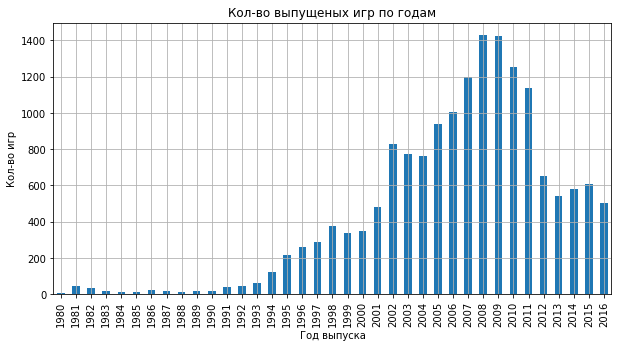

In [17]:
# для визуализации постороим график
group_years.plot (x='year_of_release',kind='bar', figsize=(10,5), grid=True )
plt.title("Кол-во выпущеных игр по годам")
plt.xlabel("Год выпуска")
plt.ylabel("Кол-во игр")
plt.show


In [18]:
#data['year_of_release'].hist(bins =30)
#plt.show()

**Вывод:** Из графика видно, что кол-во выпущенных игор начали увеличиваться с 1994 г. До этого времени, кол-во игр было незначительное.

### Посмотрим, как менялись продажи по платформам.

In [19]:
group_platform= data.pivot_table(index='platform', values='sales', aggfunc='sum')
#group_platform.sort_values(by='sales', ascending=False) # отсортируем кол-во продаж для платформ, по убыванию.


<function matplotlib.pyplot.show(close=None, block=None)>

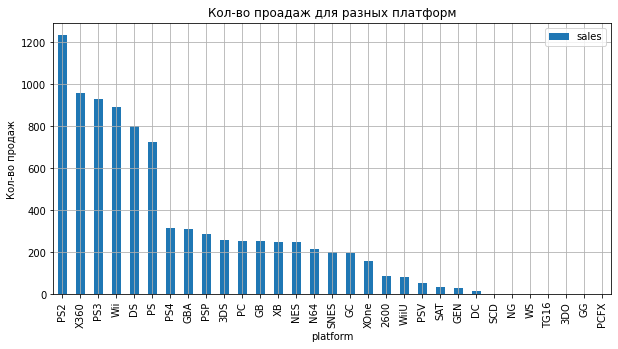

In [20]:
group_platform.sort_values(by='sales', ascending=False).plot(grid=True, kind='bar',figsize=(10, 5))
plt.title("Кол-во проадаж для разных платформ")

plt.ylabel("Кол-во продаж")
plt.show

**Вывод:** Наиболее популярные платформы: PS2, X360, PS3, Wii, DS,PS

Рассмотрим распределение по годам для самых популярных платформ. и изучим за какой характерный срок появляются новые и исчезают старые платформы

<AxesSubplot:xlabel='year_of_release'>

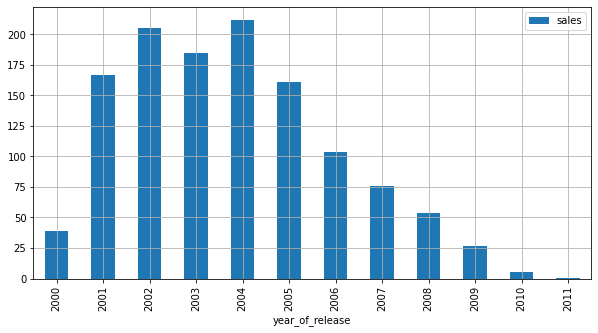

In [21]:
(data.query('platform=="PS2" and year_of_release>=1994')
.pivot_table(index='year_of_release', values='sales', aggfunc='sum')
.plot(kind='bar', figsize=(10,5), grid=True ))
 

Продажи для PS2 просуществовали 12 лет.

<AxesSubplot:xlabel='year_of_release'>

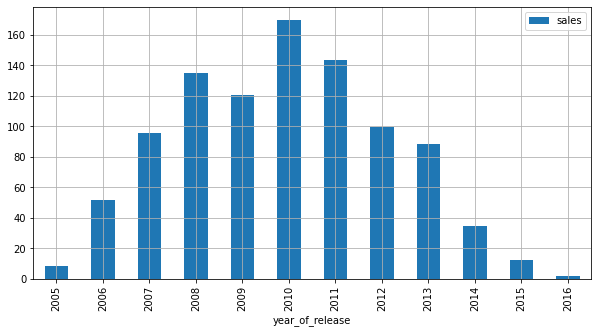

In [22]:
(data.query('platform=="X360" and year_of_release>=1994')
.pivot_table(index='year_of_release', values='sales', aggfunc='sum')
.plot(kind='bar', figsize=(10,5), grid=True ))

Продажи для X360 просуществовали 12 лет.

<AxesSubplot:xlabel='year_of_release'>

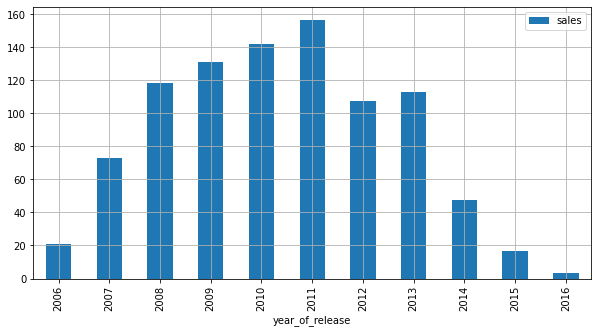

In [23]:
(data.query('platform=="PS3" and year_of_release>=1994')
.pivot_table(index='year_of_release', values='sales', aggfunc='sum')
.plot(kind='bar', figsize=(10,5), grid=True ))

Продажи для PS2 просуществовали 11 лет.

<AxesSubplot:xlabel='year_of_release'>

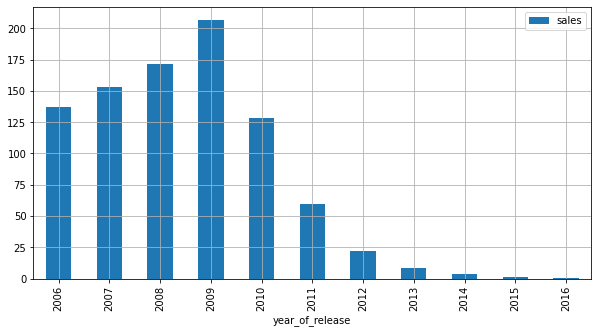

In [24]:
(data.query('platform=="Wii" and year_of_release>=1994')
.pivot_table(index='year_of_release', values='sales', aggfunc='sum')
.plot(kind='bar', figsize=(10,5), grid=True ))

Продажи для Wii просуществовали 11 лет.

<AxesSubplot:xlabel='year_of_release'>

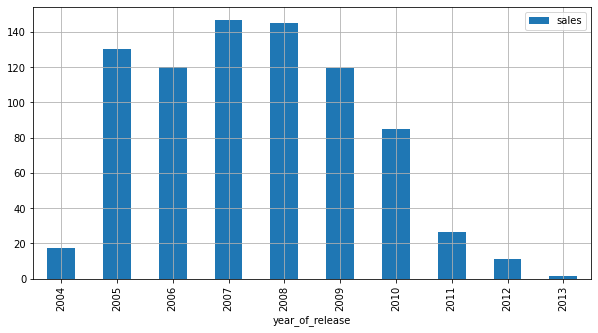

In [25]:
(data.query('platform=="DS" and year_of_release>=1994')
.pivot_table(index='year_of_release', values='sales', aggfunc='sum')
.plot(kind='bar', figsize=(10,5), grid=True ))

Продажи для Wii просуществовали 10 лет.

<AxesSubplot:xlabel='year_of_release'>

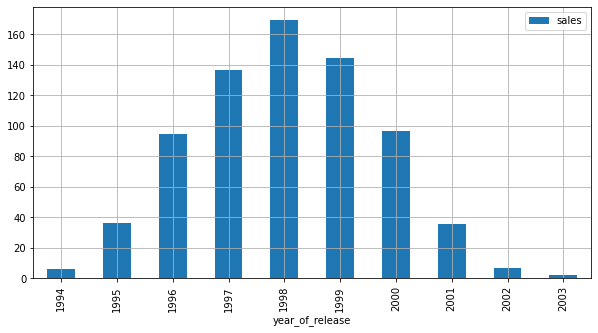

In [26]:
(data.query('platform=="PS" and year_of_release>=1994')
.pivot_table(index='year_of_release', values='sales', aggfunc='sum')
.plot(kind='bar', figsize=(10,5), grid=True ))

Продажи для PS просуществовали 10 лет.

**Вывод:** За примерно 10-12 лет появляются и исчезаю платформы. Сначала продажи растут, а затем падают. Так же видно, что наибольший пик популярности платформ приходится на 5-6 год продаж. При этом мы видим, что платформы с самыми большими продажами к 2016 уже почти не продаются. Значит есть смысл рассмотреть более перспективные платформы.

### Составим прогноз на 2017 г. на основе уже изученных данных.

<AxesSubplot:xlabel='year_of_release'>

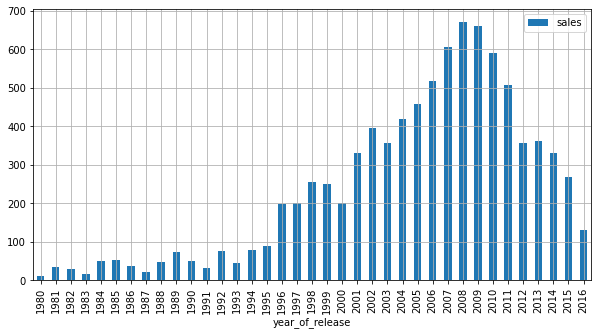

In [27]:
(data.pivot_table(index='year_of_release', values='sales', aggfunc='sum')
.plot(kind='bar', figsize=(10,5), grid=True ))

Т.к мы выяснили, что как правило, наибольшие продажи по консолям выпадают на 5-6 год их существования, а далее продажи по популярным консолям идут на спад, следовательно актуальным периодом, для выбора наиболее перспективных  консолей, будем считать 2011-2016 г. Для оценки перспектив на 2017 г., нужно использовать те платформы, продажи игр на которых в этот период растут.

In [28]:
per_platform = data.query('platform != ["PS2", "X360", "PS3", "Wii", "DS","PS"] and year_of_release>=2011')
#per_platform

Text(0, 0.5, 'Кол-во продаж')

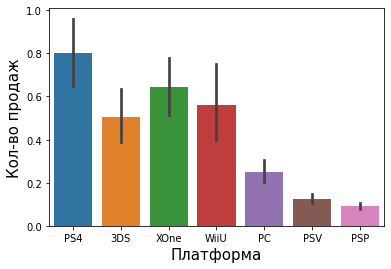

In [29]:
sns.barplot(data = per_platform, x='platform', y='sales')
plt.xlabel('Платформа', fontsize=15)
plt.ylabel('Кол-во продаж',fontsize=15)


Наибольшую перспективность я вижу платформах PS4,3DS,XOne,WiiU platform ввиду того, что , как мы видим из график, у них большие продажи за рассматриваемый нами период. Значит в 2017 году ожидаем рост продаж по этим платформам.

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 720x720 with 0 Axes>

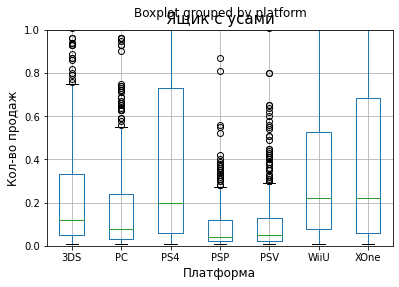

In [30]:
plt.figure(figsize=(10,10))

per_platform.boxplot(column=['sales' ], by = ['platform'])
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Кол-во продаж',fontsize=12)
plt.ylim(0, 1)
plt.show


Наибольшую перспективность я вижу платфоромах PS4,3DS,XOne,WiiU platform.

<function matplotlib.pyplot.show(close=None, block=None)>

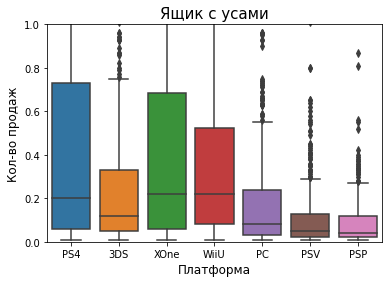

In [31]:
# Нарисуем график покрасивее.
sns.boxplot(data = per_platform, x='platform', y='sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Кол-во продаж',fontsize=12)
plt.ylim(-0, 1)
plt.show


Видим присутствие выбросов у всех, кроме PS4, XOne, WiiU. На остальных платформах есть выбросы с большим кол-вом продаж. Видимо это какие то хиты, которые либо выпущены именно для этих платформ, либо адаптированный под них, возможно это отдельные жанры. Значит мы не ошиблись в наших предположениях касательно наиболее перспективных площадок. Там и продаж больше и они более сконцентрированы.

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

Рассмотрим перспективную платформу XOne

In [32]:
xone= data.query('platform == ["XOne"]')
#xone        

Text(0.5, 1.0, 'Диаграмма рассеяния отзыв пользователя')

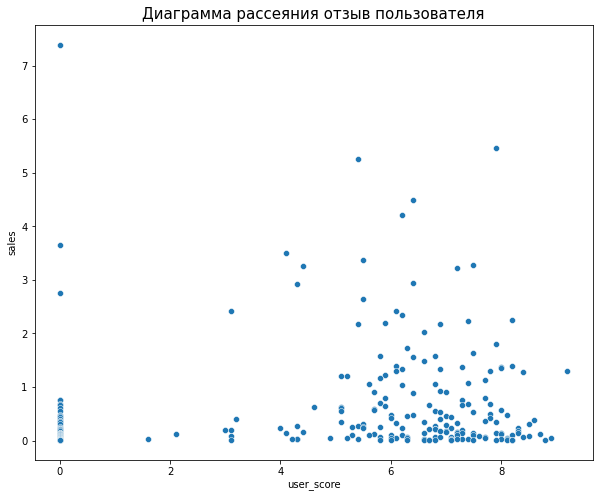

In [33]:
#Построим диаграмму рассеяния отзыв пользователя
plt.figure(figsize=(10,8))
sns.scatterplot(x='user_score', y='sales', data=xone)
plt.title('Диаграмма рассеяния отзыв пользователя', fontsize=15)


Text(0.5, 1.0, 'Диаграмма рассеяния отзыв критиков')

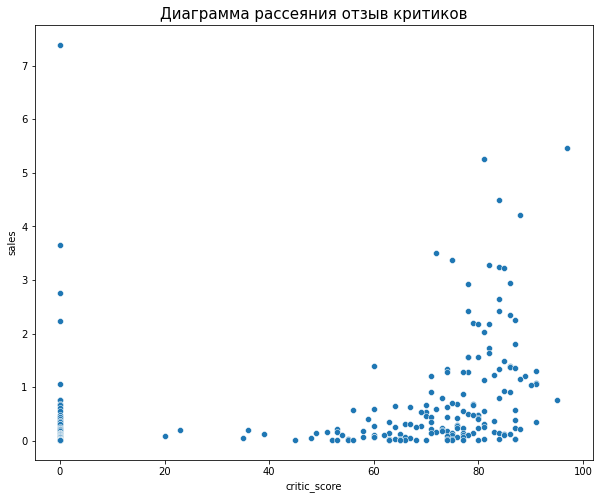

In [34]:
#Построим диаграмму рассеяния отзыв пользователя
plt.figure(figsize=(10,8))
sns.scatterplot(x='critic_score', y='sales', data=xone)
plt.title('Диаграмма рассеяния отзыв критиков', fontsize=15)

**Вывод:** Видим, что профессионалы лучше чувствуют рынок. Чем выше отзывы критиков тем видим больше продаж. У пользователей мы видим, что даже с нулевыми отзывами есть хорошие продажи.

Посмотрим как отзывы критиков и пользователей  коррелируются  между собой

In [35]:
xone['critic_score'].corr(xone['sales']) # корреляция отзывы критиков и продажами


0.2748391874944539

In [36]:
xone['user_score'].corr(xone['sales'])# корреляция отзывы пользователей и продажами

0.11656261405851895

Коэффициент корреляции подтверждает предыдущий вывод. Оценка Критиков лучше коррелируется с продажами. 

### Соотнесем продажи игр на других платформах с отзывами критиков и пользователей.

In [37]:
other_platform =  ['PS4', 'WiiU','PC','PSV','PSP','3DS']
other_platform

['PS4', 'WiiU', 'PC', 'PSV', 'PSP', '3DS']

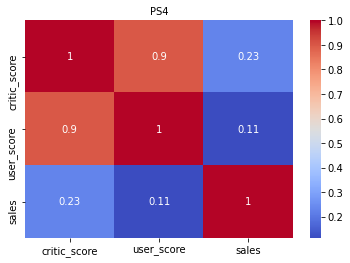

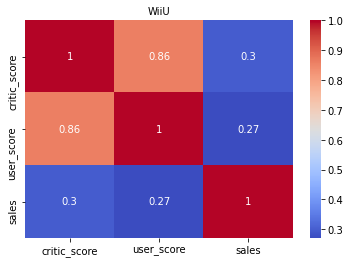

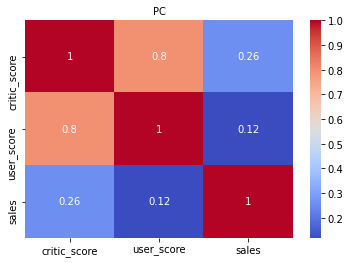

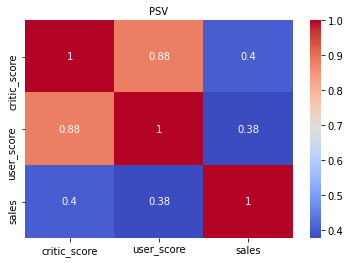

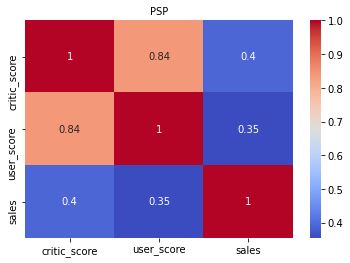

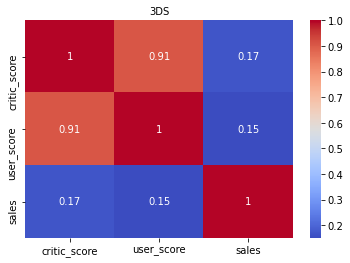

In [38]:
for platforms in other_platform:
    sort=per_platform.loc[per_platform['platform'] == platforms]
    heatmap = sort[['critic_score', 'user_score', 'sales']] 
    sns.heatmap (heatmap.corr(),cmap='coolwarm',annot=True)   
    plt.title(platforms, fontsize=10)
    plt.show()      


**Вывод:** В целом по остальным платформам корреляции так же как и для платформы XOne, которую мы рассматривали отдельно. Кол-во продаж больше зависит от отзывов критиков, больше чем от отзывов пользователей. Но для платформ 3DS и PSV разница между отзывами пользователей и критиков не такая и большая, но и продажи там самые маленькие (среди рассмотренных).

### Рассмотрим общее распределение игр по жанрам. Рассмотрим какие жанры самые прибыльные

In [39]:
per_platform['genre'].value_counts()

Action          796
Role-Playing    346
Adventure       304
Sports          184
Misc            170
Shooter         162
Strategy         93
Racing           93
Simulation       89
Platform         77
Fighting         74
Puzzle           40
Name: genre, dtype: int64

Больше всего игр в жанре Action -796, затем Role-Playing-346 и Adventure -304.  Посмторим как эти игры продаются

<AxesSubplot:xlabel='genre'>

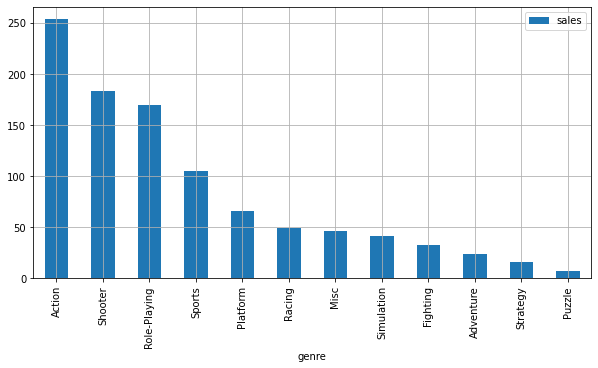

In [40]:
genre_sales=per_platform.pivot_table(index='genre', values='sales', aggfunc='sum')
genre_sales.sort_values(by='sales', ascending=False).plot(kind='bar', figsize=(10,5), grid=True )

**Вывод:** Аction и Role-Playing-346 действительно неплохо продаются, а вот  Adventure в топ 3 самых низких продаж (там же Strategy и Puzzle ). Зато мы видим, что Shooter очень хорошо продаются, при  этом на рынке их не так много. Может быть стоит в 2017 закупить больше копий игр в этом жанре, очевидно, что их быстро разбирают.

## Составим портрет пользователя каждого региона


Определим для пользователя каждого региона (NA, EU, JP):

-Самые популярные платформы (топ-5)

-Самые популярные жанры (топ-5).

### Для Америки рассмотрим топ 5 платформ и жанров.

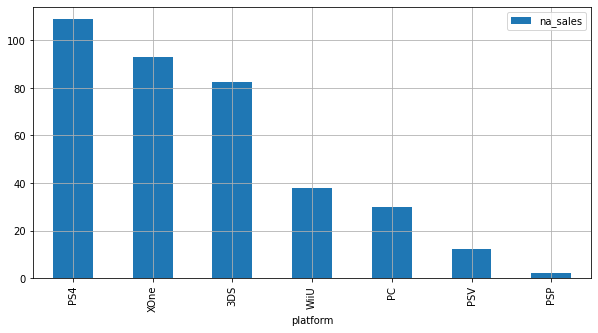

In [41]:
# Топовые платформы для Америики.
region_platform_usa=per_platform.pivot_table(index='platform', values='na_sales', aggfunc='sum') # Топовые платформы для Америики.
region_platform_usa.sort_values(by='na_sales', ascending=False).plot(kind='bar', figsize=(10,5), grid=True )
plt.show()


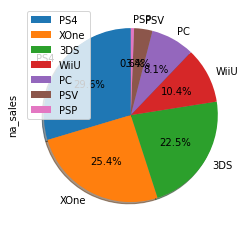

(None,)

In [42]:
region_platform_usa.sort_values(by='na_sales', ascending=False).plot.pie(subplots=True, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show(),

**Для Америке ТОП 5 платформ** - PS4 (доля 29.5%), XOne(25.4%), 3DS(22,5%), WiiU(10.4%), PC (8.1%)

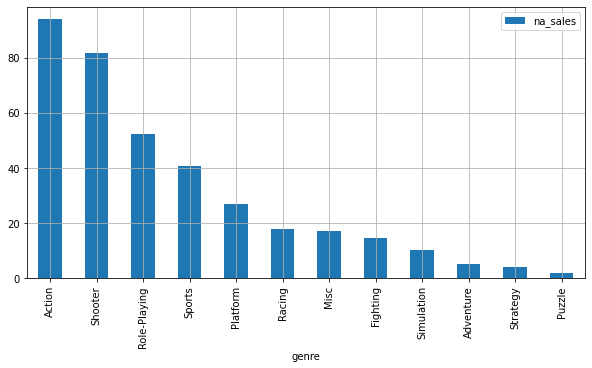

In [43]:
# Топовые жанры для Америики.
region_gengre_usa=per_platform.pivot_table(index='genre', values='na_sales', aggfunc='sum') # Топовые платформы для Америики.
region_gengre_usa.sort_values(by='na_sales', ascending=False).plot(kind='bar', figsize=(10,5), grid=True )
plt.show()

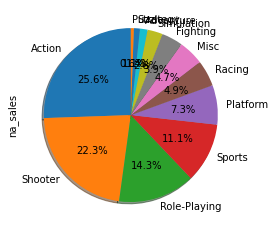

In [44]:
region_gengre_usa.sort_values(by='na_sales', ascending=False).plot.pie(subplots=True, legend=None,autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

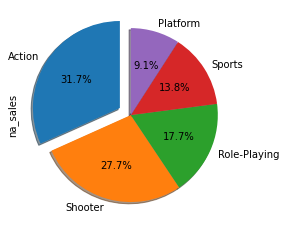

In [45]:
explode = (0.15, 0, 0, 0, 0)
region_gengre_usa.sort_values(by='na_sales', ascending=False)\
                .head(5).plot\
                .pie(subplots=True, legend=None,autopct='%1.1f%%', shadow=True, startangle=90, explode=explode)
plt.show()

**Для Америке ТОП 5 жанров** - Action (Action доля продаж 25.6%), Shooter (22.3%), Role-Playing(14,3%), Sports(11.1%), Platform (7.3%)

### Для Европы расссмотрим топ 5 платформ и жанров.

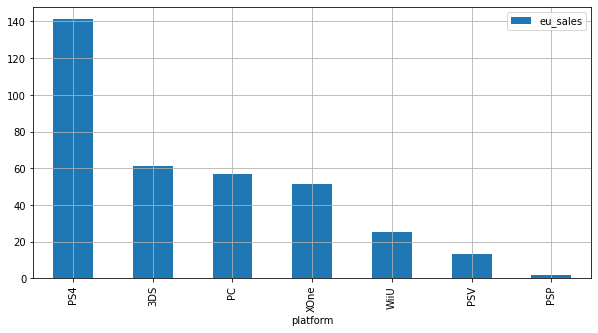

In [46]:
# Топовые платформы для Европы.
region_platform_eu=per_platform.pivot_table(index='platform', values='eu_sales', aggfunc='sum') # Топовые платформы для Америики.
region_platform_eu.sort_values(by='eu_sales', ascending=False).plot(kind='bar', figsize=(10,5), grid=True )
plt.show()


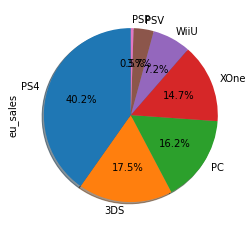

In [47]:
region_platform_eu.sort_values(by='eu_sales', ascending=False).plot.pie(subplots=True, legend=None,autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

**Для Европы ТОП 5 платформ** - PS4 (доля 40.2%), 3DS(17,5%),PC (16.2%), Xone(14,7) , WiiU(7.2%)

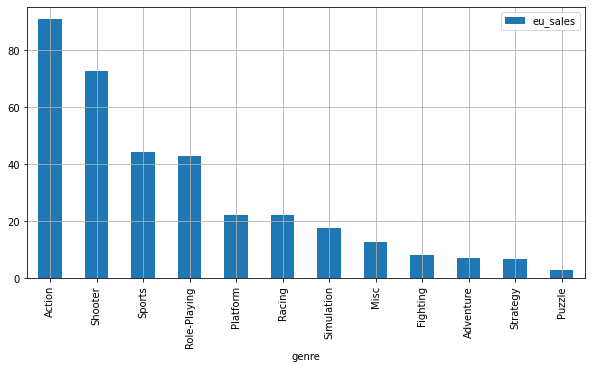

In [48]:
# Топовые жанры для Евровы.
region_gengre_eu=per_platform.pivot_table(index='genre', values='eu_sales', aggfunc='sum') # Топовые платформы для Америики.
region_gengre_eu.sort_values(by='eu_sales', ascending=False).plot(kind='bar', figsize=(10,5), grid=True )
plt.show()

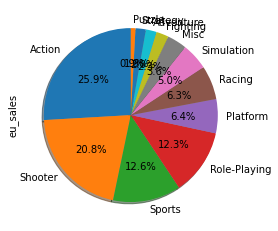

In [49]:
region_gengre_eu.sort_values(by='eu_sales', ascending=False).plot.pie(subplots=True, legend=None,autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

**Для Европы ТОП 5 жанров** - Action (Action доля продаж 25.9%), Shooter (20.8%), Sports(12,6%), Role-Playing(12.3%), Platform (6.4%)

### Визуализируем сравнение продаж платформ в Америке и Европе.

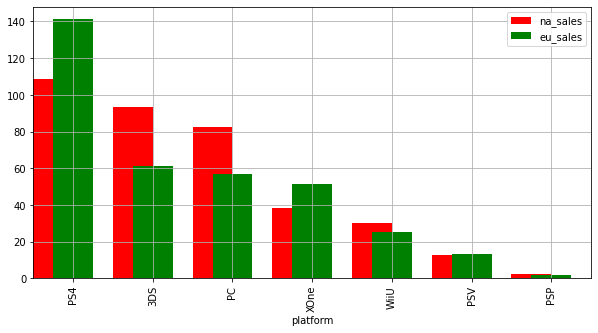

In [50]:
ax=region_platform_usa.sort_values(by='na_sales', ascending=False).plot(kind='bar',color='red', figsize=(10,5), grid=True, position=1 )

region_platform_eu.sort_values(by='eu_sales', ascending=False).plot(kind='bar', color='green', figsize=(10,5), grid=True,ax=ax,position=0.5)
plt.show()

PS 4 самая популярная игровая приставка и в Европе и в Америке. Затем конкуренты, которые конкурируют за 2-ое место XOne, 3DS, WiiU,  и PC 

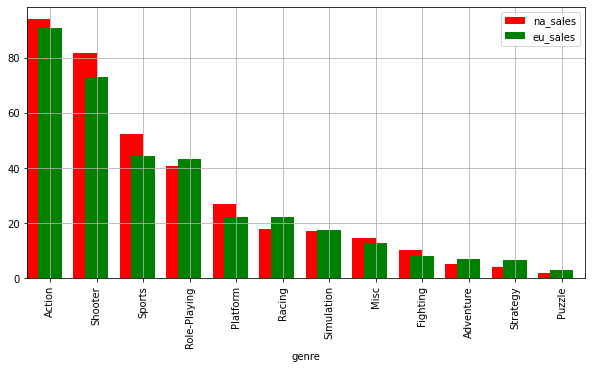

In [51]:
ax=region_gengre_usa.sort_values(by='na_sales', ascending=False).plot(kind='bar',color='red', figsize=(10,5), grid=True, position=1)
region_gengre_eu.sort_values(by='eu_sales', ascending=False).plot(kind='bar',color='green', figsize=(10,5), grid=True,position=0.5, ax=ax)
plt.show()

Action самый популярный жан как в Европе так и в Америке, в спину ему в Америке дышит Shooter, в Европе чуть меньше, но тоже на втором месте. за 3 место между собой борются Role-Playing и Sports. 

**Вывод:** В общем и целом мы видим, что популярностью и в Европе и в Америке пользуются одни и те же платформы и жанры игр.

### Для Японии расссмотрим топ 5 платформ и жанров.

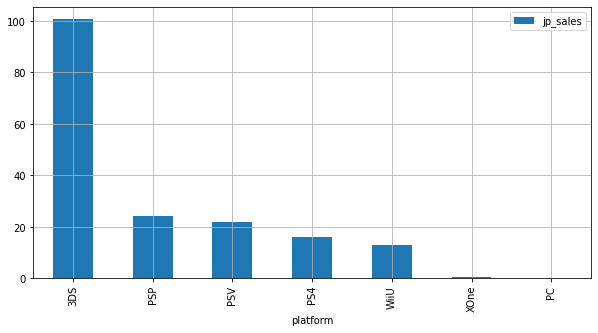

In [52]:
# Топовые платформы для Японии.
region_platform_jp=per_platform.pivot_table(index='platform', values='jp_sales', aggfunc='sum') # Топовые платформы для Америики.
region_platform_jp.sort_values(by='jp_sales', ascending=False).plot(kind='bar', figsize=(10,5), grid=True )
plt.show()

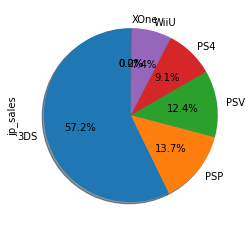

In [53]:
region_platform_jp.sort_values(by='jp_sales', ascending=False).plot.pie(subplots=True, legend=None,autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

**Для Японии ТОП 5 платформ** - 3DS (доля 57.2%), PSP(13.7%), PSV(12,4%), PS4(9,1%), WiiU(14%)

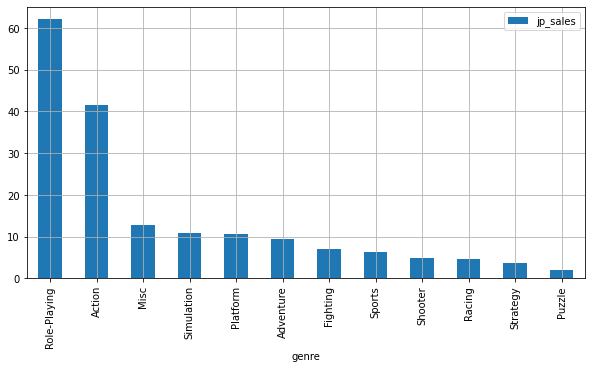

In [54]:
# Топовые ;fyhs для Японии.
region_gengre_jp=per_platform.pivot_table(index='genre', values='jp_sales', aggfunc='sum') # Топовые платформы для Америики.
region_gengre_jp.sort_values(by='jp_sales', ascending=False).plot(kind='bar', figsize=(10,5), grid=True )
plt.show()

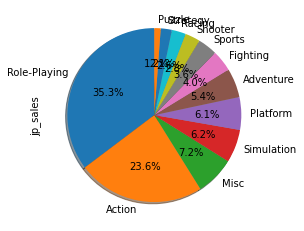

In [55]:
region_gengre_jp.sort_values(by='jp_sales', ascending=False).plot.pie(subplots=True, legend=None,autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

**Для Японии ТОП 5 жанров** - Role-Playing(35.3%), Action (24.6%), Misc (7.2%), Simulation(12,6%), , Platform (6.4%)

**Вывод:** Мы видим, что у Японии наиболее популярная платформа это 3DS. Причем на столько популярная, что занимает больше половины всех продаж. 3DS это портативная игровая консоль. На 2-3 и тоже портативные консоли. Значит в Японии в основном пользуются портативными консолями, в то время как в Европе и Америке пользуются стационарными платформами. Думаю это связано с тем, что в Японии много работают и играют в приставки по пути на работу. 
Популярные жанры в Японии тоже свои. Наиболее популярный жанр это Role-Playing. Думаю из-за любви японцев к косплей косплею. Мы так же видмим, что японцы как и весь мир любят игры в стиле Action, этот жанр на 2 месте. Думаю для нашего магазина есть смысл закупить игр в этом жанре(Action) побольше.

### Проверим влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [56]:
per_platform['rating'].value_counts()

        1200
T        339
M        333
E        309
E10+     246
RP         1
Name: rating, dtype: int64

<AxesSubplot:xlabel='rating'>

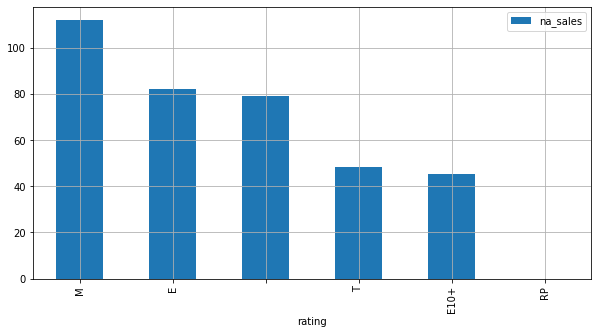

In [57]:
region_reting_us=per_platform.pivot_table(index='rating', values='na_sales', aggfunc='sum') # Топовые платформы для Америики.
region_reting_us.sort_values(by='na_sales', ascending=False).plot(kind='bar', figsize=(10,5), grid=True )

<AxesSubplot:xlabel='rating'>

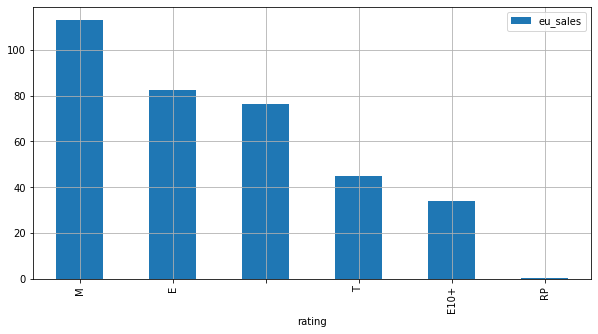

In [58]:
region_reting_eu=per_platform.pivot_table(index='rating', values='eu_sales', aggfunc='sum') # Топовые платформы для Европа.
region_reting_eu.sort_values(by='eu_sales', ascending=False).plot(kind='bar', figsize=(10,5), grid=True)       

<AxesSubplot:xlabel='rating'>

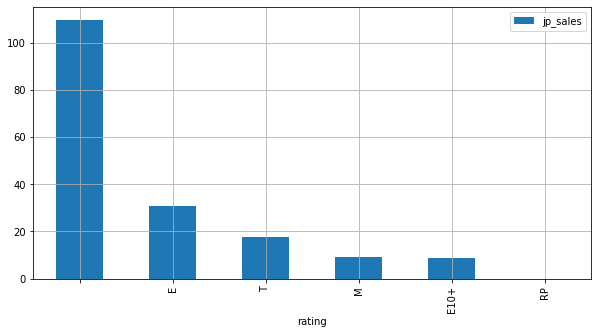

In [59]:
region_reting_jp=per_platform.pivot_table(index='rating', values='jp_sales', aggfunc='sum') # Топовые платформы для Европа.
region_reting_jp.sort_values(by='jp_sales', ascending=False).plot(kind='bar', figsize=(10,5), grid=True)       

Как известно рейтинг можно расшифровать

AO (Adults only 18+) — только для взрослых

E - everyone - для всех

M (Mature 17+) — от 17 лет

T (Teen) — для подростков 13-19 лет

K-A (Kids to Adults)— для детей и взрослых

E10+ (Everyone 10+) — для всех старше 10 лет

EC (Early Childhood) — для детей младшего возраста

RP (Rating pending) — рейтинг ожидается

<AxesSubplot:xlabel='rating'>

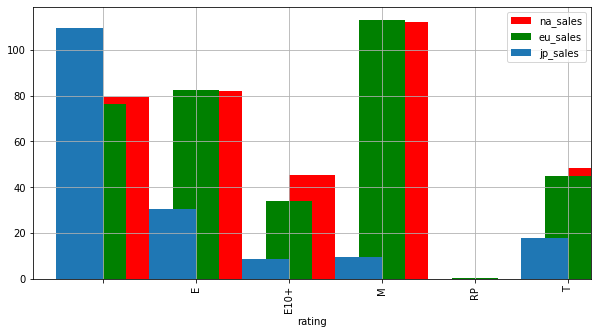

In [60]:
ax=region_reting_us.plot(kind='bar', figsize=(10,5),position=0 ,color='red', grid=True,)
ax1=region_reting_eu.plot(kind='bar', figsize=(10,5),color='green', grid=True, ax=ax) 
region_reting_jp.plot(kind='bar', figsize=(10,5), grid=True,position=1, ax=ax1)  

**Вывод:** И в Европе и в Америке основные потеребили игр, это люди от 17 лет(M категория), и это понятно учитывая жанры игр(shooter и action).На втором месте игры для всех возрастных категориях (E категория ). В Японии в основном игры без возрастного ограничения, либо просто игры для всех. Думаю там просто нет жестокого регулирования по возрасту.

##  Проверим гипотезы


### Проверим гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.


Будем считать **нулевой теорий**, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Будем считать **альтернативной теорией**, средние пользовательские рейтинги платформ Xbox One и PC различные.

**Вывод:** Не получилось отвернуть нулевыую теорию, значит считаем, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

In [61]:
xone_gip=per_platform.query(('platform == "XOne"'))['user_score']# выборка для Xbox One
ps_gip=per_platform.query(('platform == "PC"'))['user_score']# выборка для PC


In [62]:
np.var(xone_gip)

9.644061367994883

In [63]:
np.var(ps_gip)

8.967233100494974

дисперсии имеют различия, значит equal_var=False

In [64]:
alpha = .01 # критический уровень статистической значимости
results = st.ttest_ind(xone_gip, ps_gip, equal_var=False)
results.pvalue

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Не получилось отвергнуть нулевую гипотезу


### Проверим утверждение, что средние пользовательские рейтинги жанров Action  и Sports разные.

Будем считать **нулевой теорией**, что средние пользовательские рейтинги жанров Action  и Sports одинаковые.

Будем считать **альтернативной теорией**, средние пользовательские рейтинги рейтинги жанров Action и Sports разные.

In [66]:
action_gip=per_platform.query(('genre == "Action"'))['user_score']# выборка для Action
sports_gip=per_platform.query(('genre == "Sports"'))['user_score']# выборка для Sports

In [67]:
np.var(action_gip)

12.45923718782354

In [68]:
np.var(sports_gip)

8.932069647920605

In [69]:
alpha = .01 # критический уровень статистической значимости
results = st.ttest_ind(action_gip, sports_gip,equal_var=False)
results.pvalue

if results.pvalue < alpha:
    print('Cредние пользовательские рейтинги жанров Action и Sports одинаковые')
else:
    print('Cредние пользовательские рейтинги рейтинги жанров Action и Sports разные')

Cредние пользовательские рейтинги рейтинги жанров Action и Sports разные


**Вывод:** Гипотиза не подтвердилась. Cредние пользовательские рейтинги рейтинги жанров Action и Sports разные. Можно предположить, что в среднем рейтинги Action выше т.к и продажи этого жанра гораздо выше чем Sports.

## Общий вывод

Мы рассмотрели файл games.csv и подготовили данные для дальнейшей обработки.
Привели все названия столбцов к строчному виду. Разобрались пропусками данных в зависимости от ситуации. Проверили строки на дубликаты. Посчитали суммарные продажи по все регионам.

Проведя анализ, мы выявили, что обычно платформы живут 10-12 лет и наибольшие продажи игр для этих платформ приходятся на 5-6 год. Потому для оценки перспективности платформ на 2017 г мы взяли период с 2011 годы и исключили платформы продажи на которые уже пережили пик и отходят на второй план. 

Мы выбрали наиболее перспективные площадки на 2017 г.  и сравнили их.

Сделали наблюдения, что на продажи игр, больше влияет рейтинги составленные критиками, а не пользователями.

В ходе исследования мы так же выяснили какие платформы наиболее популярный для того или иного региона 

Для Северной Америке : PS4 (доля от всех продаж 29.5%), XOne(25.4%), 3DS(22,5%), WiiU(10.4%), PC (8.1%)

Для Европы:  PS4 (доля 40.2%), 3DS(17,5%),PC (16.2%), Xone(14,7) , WiiU(7.2%)

Для Японии: 3DS (доля 57.2%), PSP(13.7%), PSV(12,4%), PS4(9,1%), WiiU(14%)


В ходе исследования мы так же выяснили какие игровые  жанры наиболее популярные для того или иного региона 

Для Северной Америке :Action (Action доля продаж 25.6%), Shooter (22.3%), Role-Playing(14,3%), Sports(11.1%), Platform (7.3%)

Для Европы:  Action (Action доля продаж 25.9%), Shooter (20.8%), Sports(12,6%), Role-Playing(12.3%), Platform (6.4%)

Для Японии: Role-Playing(35.3%), Action (24.6%), Misc (7.2%), Simulation(12,6%), , Platform (6.4%)

Сделали вывод, что Японский рынок сильно отличается от Американского и Европейского, и что в Японии популярны портативные игровые  платформы. В Европе и Америке популярны стационарные игровые платформы. Но не смотря на то, что и жанры в Японии любят больше Ролевые, но как и во всем мире любят жанр Action.

Так же мы рассмотрели как рейтинг ESRB влияет на продажи, и сделали вывод, что в Японии с возрастными ограничениями проблем нет.

Мы рассмотрели две гипотезы  и выяснили, что 
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Средние пользовательские рейтинги рейтинги жанров Action и Sports разные. Потому, что в среднем рейтинги Action выше т.к и продажи этого жанра гораздо выше чем Sports.